In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# EDA

## Handling null values and duplicates

In [3]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [4]:
df["loan_id"].duplicated().sum()

np.int64(0)

In [5]:
# There are no null values or duplicates in the data

In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
# Some Isights

# The avg for every customer is around 2 -3 
# The avg income of the customer is around 50.59 lakhs
# The avg loan amount is around 1.51 cr

In [8]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [9]:
# We can see white spaces here which we need to strp
df.columns = df.columns.str.strip()
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [10]:
# The white spaces is removed now

# Just to be sure removing leading / trailing spaces 
for col in df.select_dtypes(include = ["object"]).columns:
    df[col] = df[col].str.strip()

# Univariate Analysis

In [11]:
lona_approved = len(df[df["loan_status"] == "Approved"])
lona_not_approved = len(df[df["loan_status"] == "Rejected"])


print("Percentage of Loan Approved is {:.2f}%".format(lona_approved/len(df.loan_status)*100))
print("Percentage of Loan Not Approved is {:.2f}%".format(lona_not_approved/len(df.loan_status)*100))

Percentage of Loan Approved is 62.22%
Percentage of Loan Not Approved is 37.78%


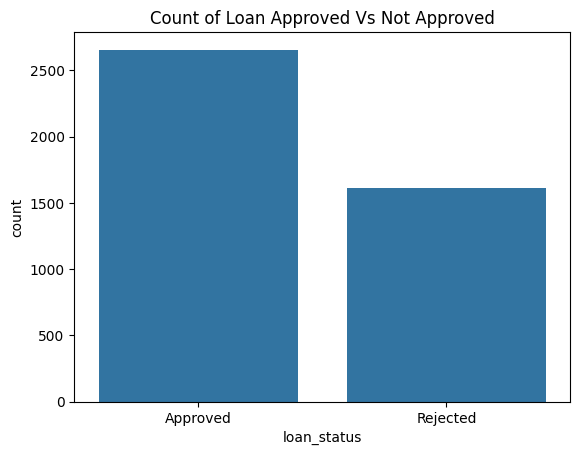

In [12]:
sns.countplot(x = "loan_status", data = df)
plt.title("Count of Loan Approved Vs Not Approved")
plt.show()

In [13]:
graduated = len(df[df["education"] == "Graduate"])
not_graduated = len(df[df["education"] == "Not Graduate"])

print("Percentage of Graduated is {:.2f}%".format(graduated/len(df.education)*100))
print("Percentage of Not Graduated is {:.2f}%".format(not_graduated/len(df.education)*100))

Percentage of Graduated is 50.22%
Percentage of Not Graduated is 49.78%


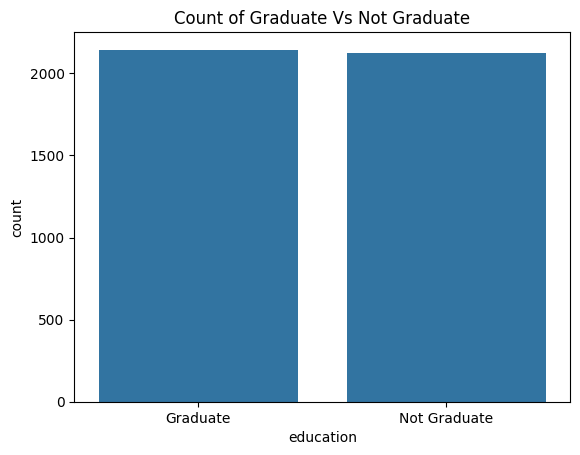

In [14]:
sns.countplot(x = "education", data = df)
plt.title("Count of Graduate Vs Not Graduate")
plt.show()

In [15]:
# Count of Graduate vs Not Graduate

self_employed = len(df[df["self_employed"] == "Yes"])
not_self_employed = len(df[df["self_employed"] == "No"])

print("Percentage of Customers Self Employed is {:.2f}%".format(self_employed/len(df.self_employed)*100))
print("Percentage of Customers not Self Employed is {:.2f}%".format(not_self_employed/len(df.self_employed)*100))

Percentage of Customers Self Employed is 50.36%
Percentage of Customers not Self Employed is 49.64%


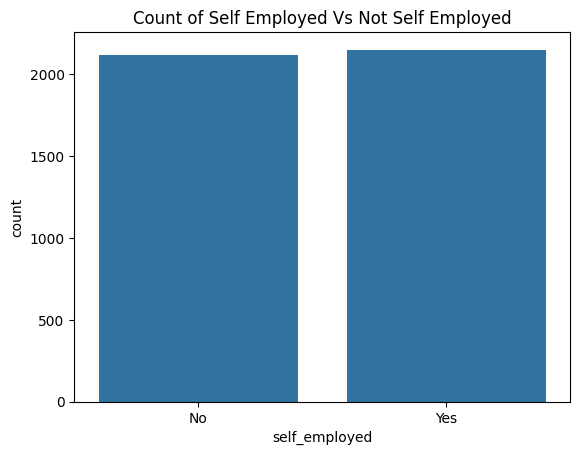

In [16]:
sns.countplot(x = "self_employed", data = df)
plt.title("Count of Self Employed Vs Not Self Employed")
plt.show()

([<matplotlib.patches.Wedge at 0x1a0b7c5c830>,
 [Text(-0.5781439311317411, 0.9358149362430249, '4'),
  Text(-1.0972274277122933, -0.07805108503963457, '3'),
  Text(-0.4693381590135124, -0.9948475724922925, '0'),
  Text(0.6248973550266643, -0.9052642131889889, '2'),
  Text(1.0975071124879223, 0.07401444479575134, '1'),
  Text(0.5227923733077856, 0.967826500159617, '5')],
 [Text(-0.3153512351627678, 0.5104445106780136, '17.6%'),
  Text(-0.598487687843069, -0.04257331911252794, '17.0%'),
  Text(-0.25600263218918856, -0.5426441304503413, '16.7%'),
  Text(0.3408531027418169, -0.4937804799212666, '16.6%'),
  Text(0.5986402431752302, 0.040371515343137085, '16.3%'),
  Text(0.28515947634970124, 0.5279053637234274, '15.8%')])

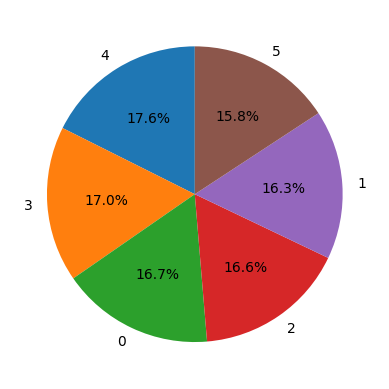

In [17]:
# Distribution of number of dependents of the customers

dependents_count = df["no_of_dependents"].value_counts()

plt.pie(dependents_count, labels = dependents_count.index, autopct = "%1.1f%%", startangle = 90)

In [18]:
# 17.6% of customers have 4 dependents

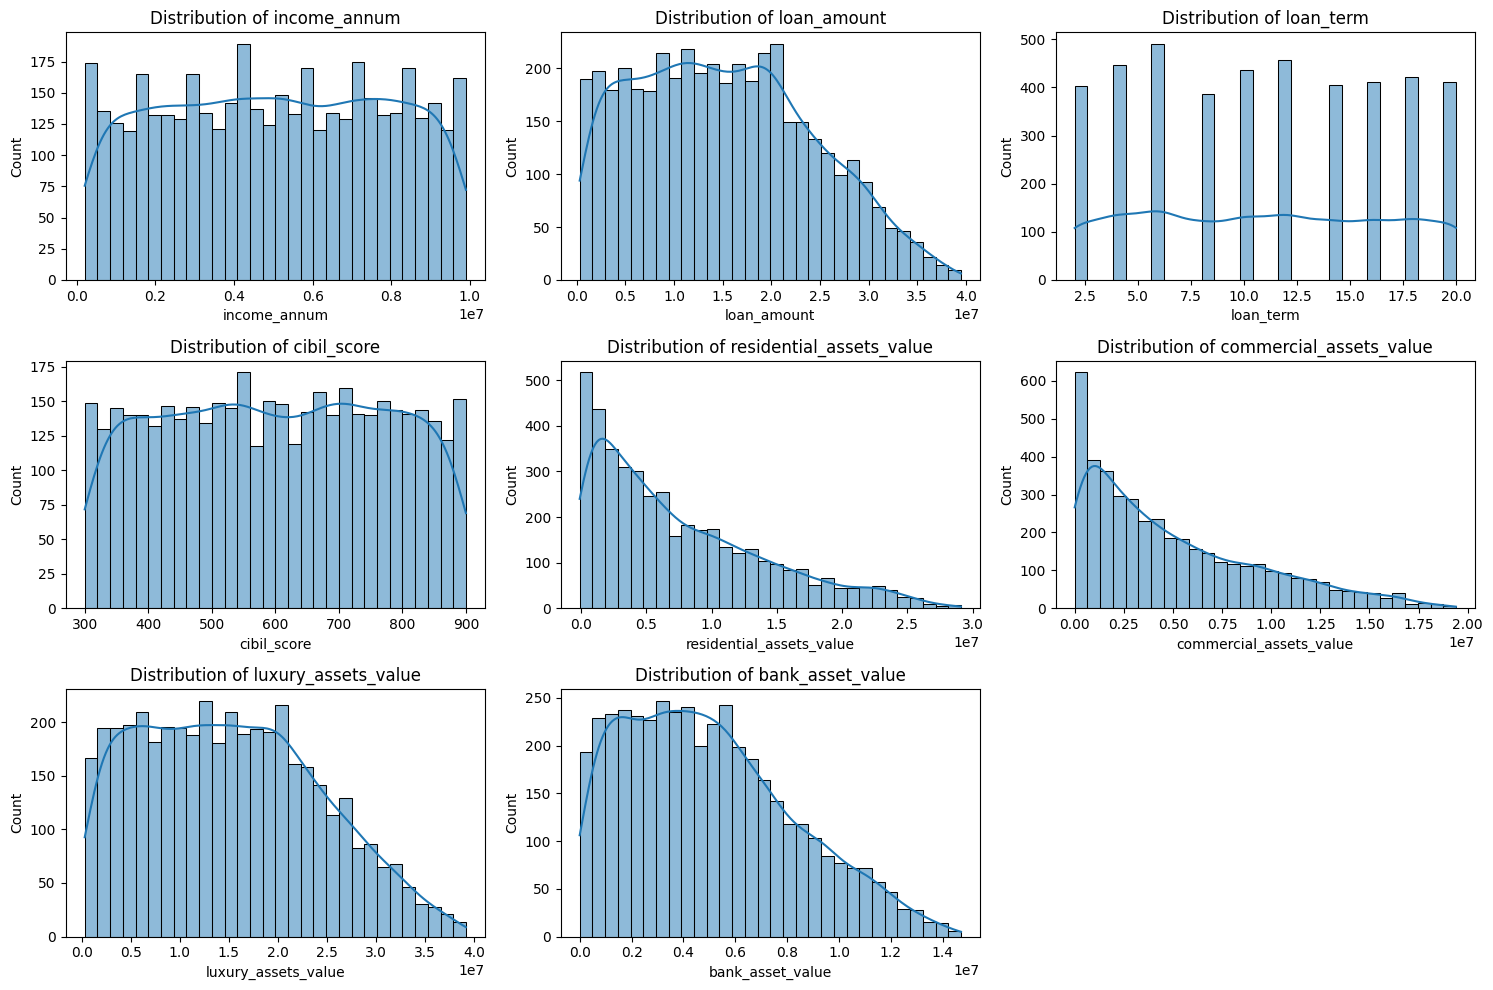

In [19]:
plt.figure(figsize=(15, 10))
cols = ["income_annum",	
        "loan_amount", 
        "loan_term", 
        "cibil_score", 
        "residential_assets_value",	
        "commercial_assets_value",	
        "luxury_assets_value",	
        "bank_asset_value"]

for i in range(len(cols)):
    plt.subplot(3, 3, i + 1)  # 3 rows × 3 cols grid
    sns.histplot(df[cols[i]], kde = True, bins = 30)
    plt.title(f'Distribution of {cols[i]}')

plt.tight_layout()
plt.show()

In [20]:
# We can see here most of the data do not follow a normal distribution

In [21]:
# Which wiil be corrected later

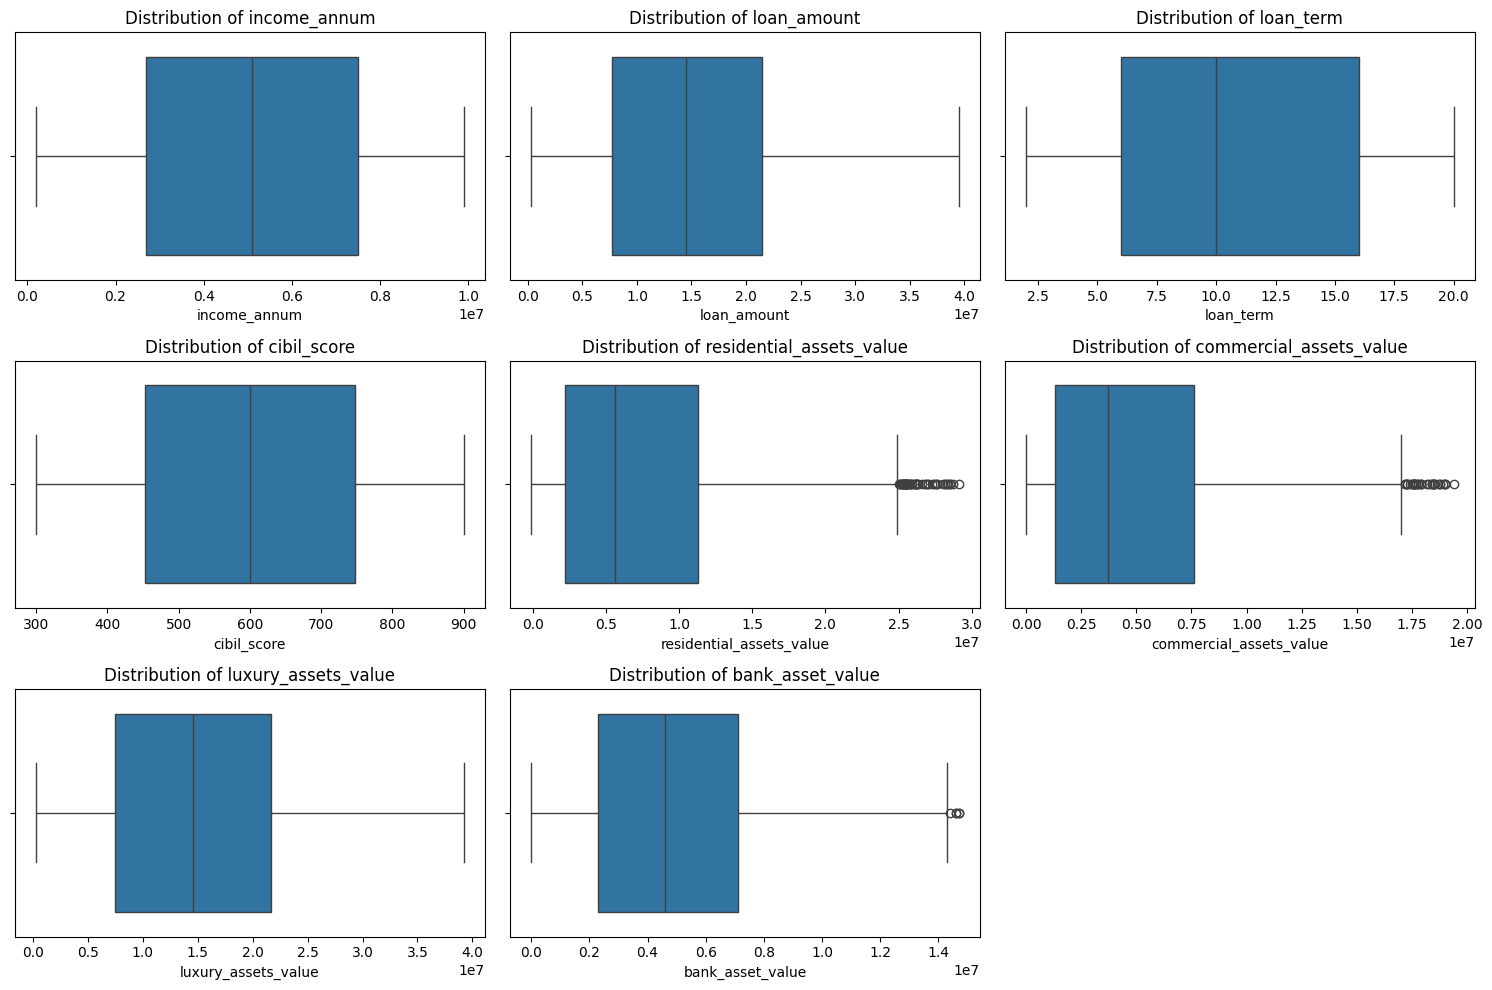

In [22]:
plt.figure(figsize=(15, 10))

cols = ["income_annum",	
        "loan_amount", 
        "loan_term", 
        "cibil_score", 
        "residential_assets_value",	
        "commercial_assets_value",	
        "luxury_assets_value",	
        "bank_asset_value"]

for i in range(len(cols)):
    plt.subplot(3, 3, i + 1)  # 3 rows × 3 cols grid
    sns.boxplot(x = df[cols[i]])
    plt.title(f'Distribution of {cols[i]}')

plt.tight_layout()
plt.show()

In [23]:
# Ressidential asset value and commercial asset value col have outliers

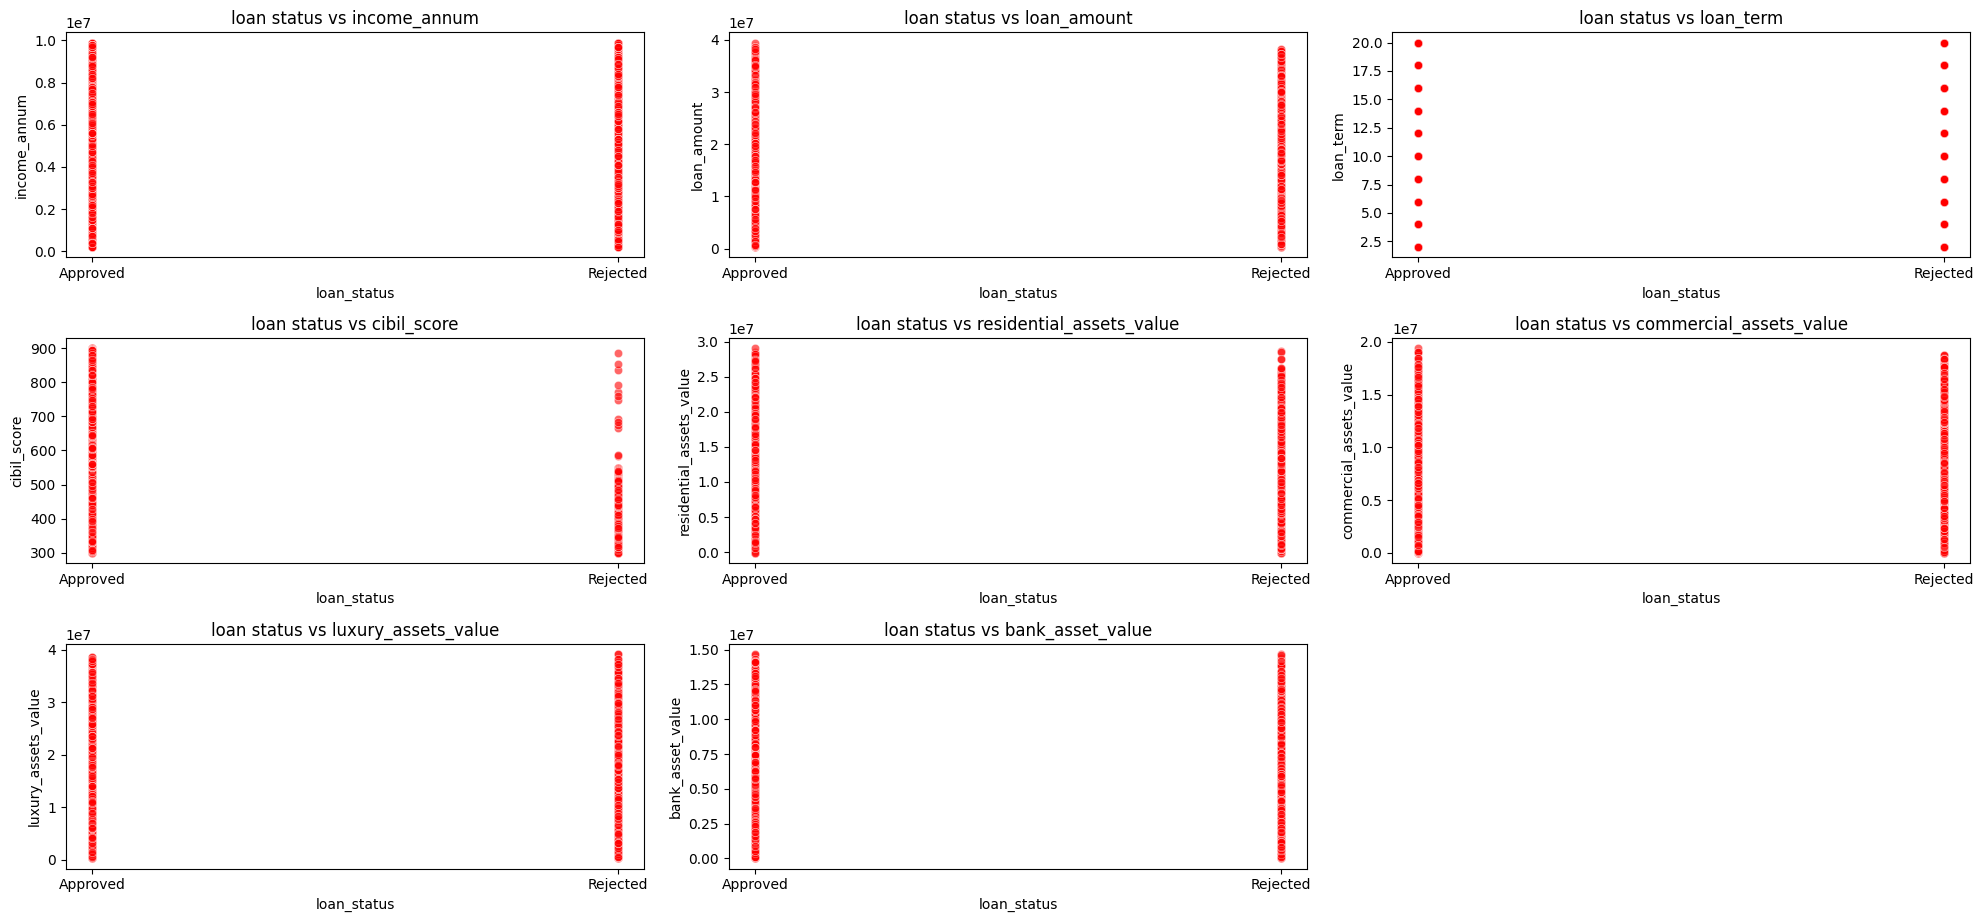

In [29]:
plt.figure(figsize=(20, 15))

cols = ["income_annum",	
        "loan_amount", 
        "loan_term", 
        "cibil_score", 
        "residential_assets_value",	
        "commercial_assets_value",	
        "luxury_assets_value",	
        "bank_asset_value"]

for i in range(len(cols)):
    plt.subplot(5, 3, i + 1)  # 3 rows × 3 cols grid
    sns.scatterplot(data = df, x = 'loan_status', y = cols[i], color = 'r', alpha = 0.6)
    plt.title(f'loan status vs {cols[i]}')

plt.tight_layout()
plt.show()

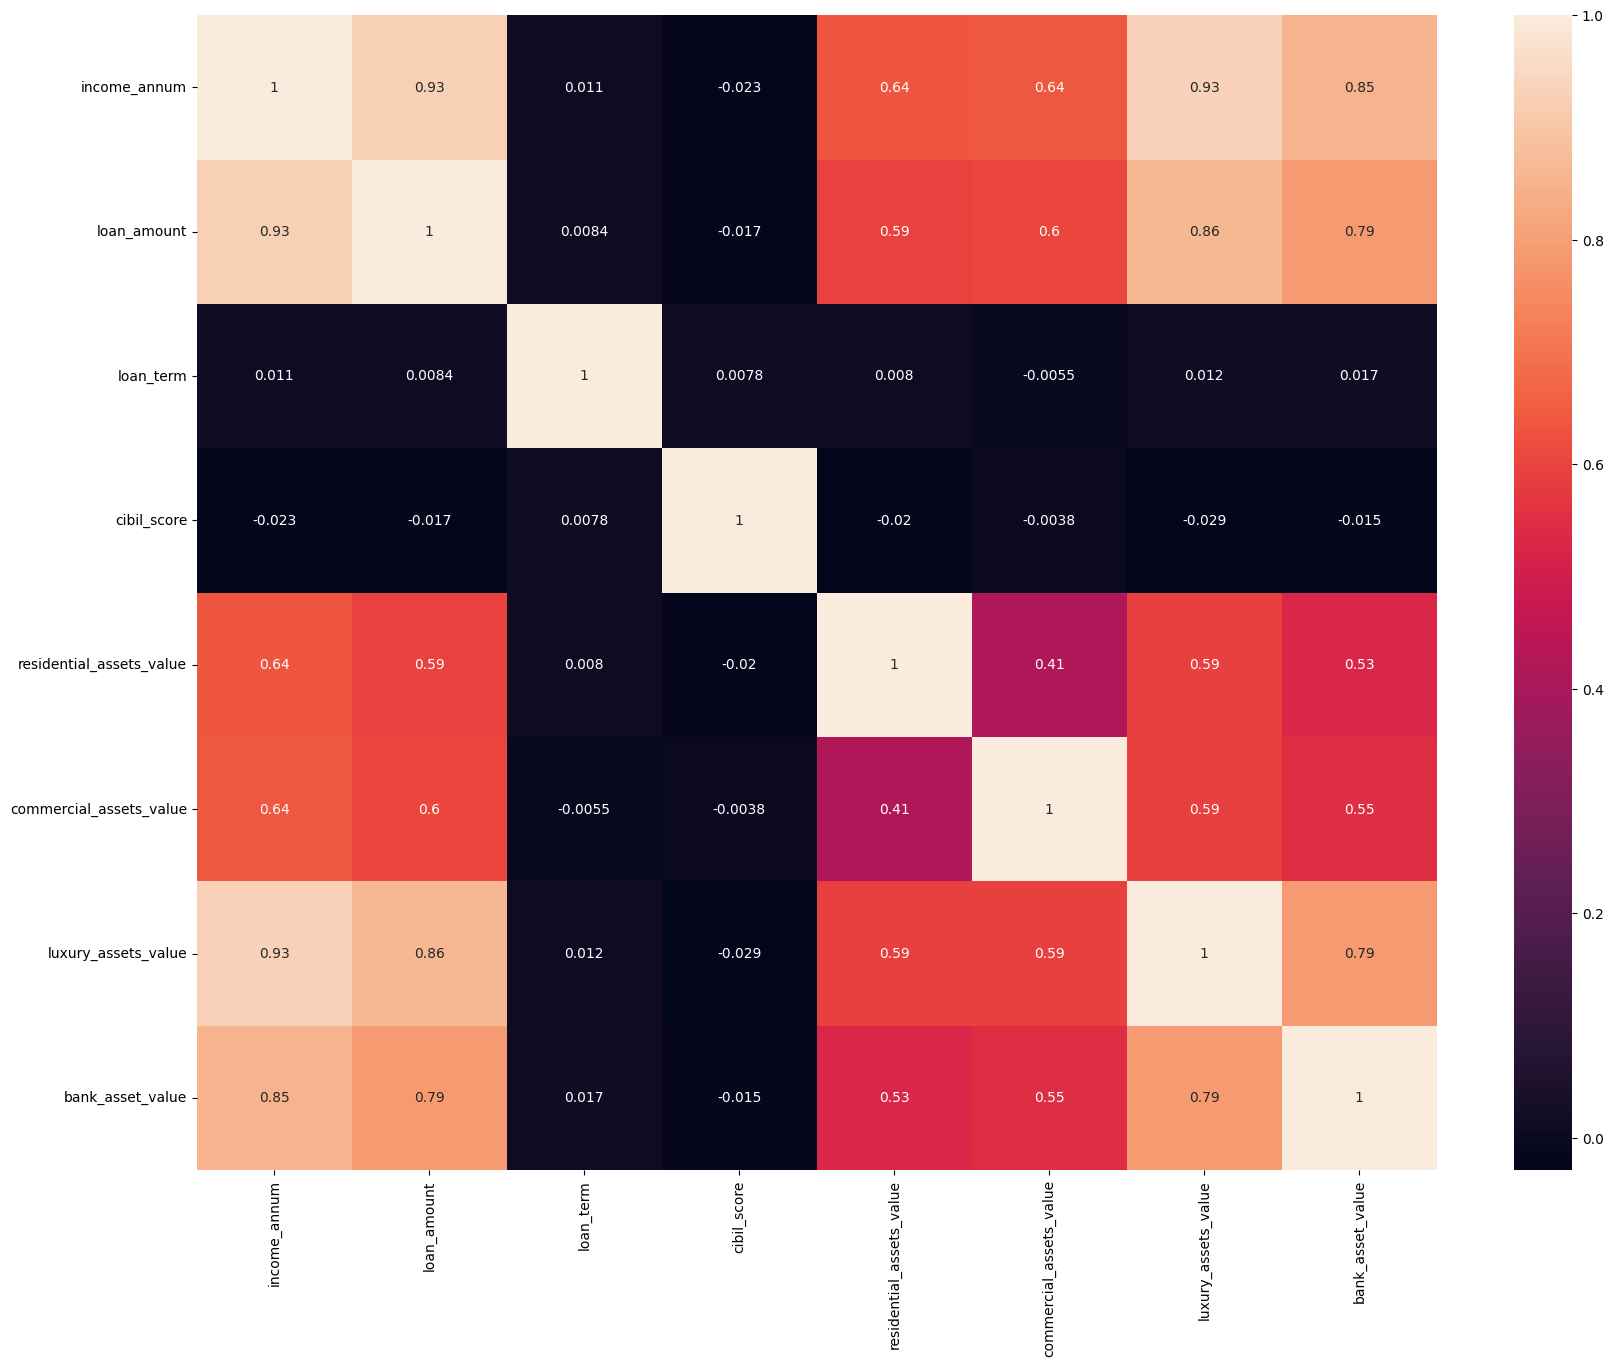

In [32]:
# Correlation Table - Heat Map
plt.figure(figsize=(20, 15))

cols = ["income_annum",	
        "loan_amount", 
        "loan_term", 
        "cibil_score", 
        "residential_assets_value",	
        "commercial_assets_value",	
        "luxury_assets_value",	
        "bank_asset_value"]

sns.heatmap(data = df[cols].corr(), annot = True, cmap = 'rocket')
plt.show()

# Data Preprocessing

In [33]:
model_data = df.copy()

In [34]:
model_data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [36]:
# Removing unnecessary cols
model_data = model_data.drop(["loan_id"], axis=1)

In [37]:
model_data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [38]:
# Removing Null Values
model_data.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [39]:
# There are no null values in the model data

In [41]:
# Data Transformation

In [42]:
model_data["loan_term"] = np.sqrt(model_data.loan_term)
model_data["cibil_score"] = np.sqrt(model_data.cibil_score)

C:\Users\BINAY\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [45]:
model_data["income_annum"] = np.log1p(model_data.income_annum)
model_data["loan_amount"] = np.log1p(model_data.loan_amount)
model_data["residential_assets_value"] = np.log1p(model_data.residential_assets_value)
model_data["commercial_assets_value"] = np.log1p(model_data.commercial_assets_value)
model_data["luxury_assets_value"] = np.log1p(model_data.luxury_assets_value)
model_data["bank_asset_value"] = np.log1p(model_data.bank_asset_value)

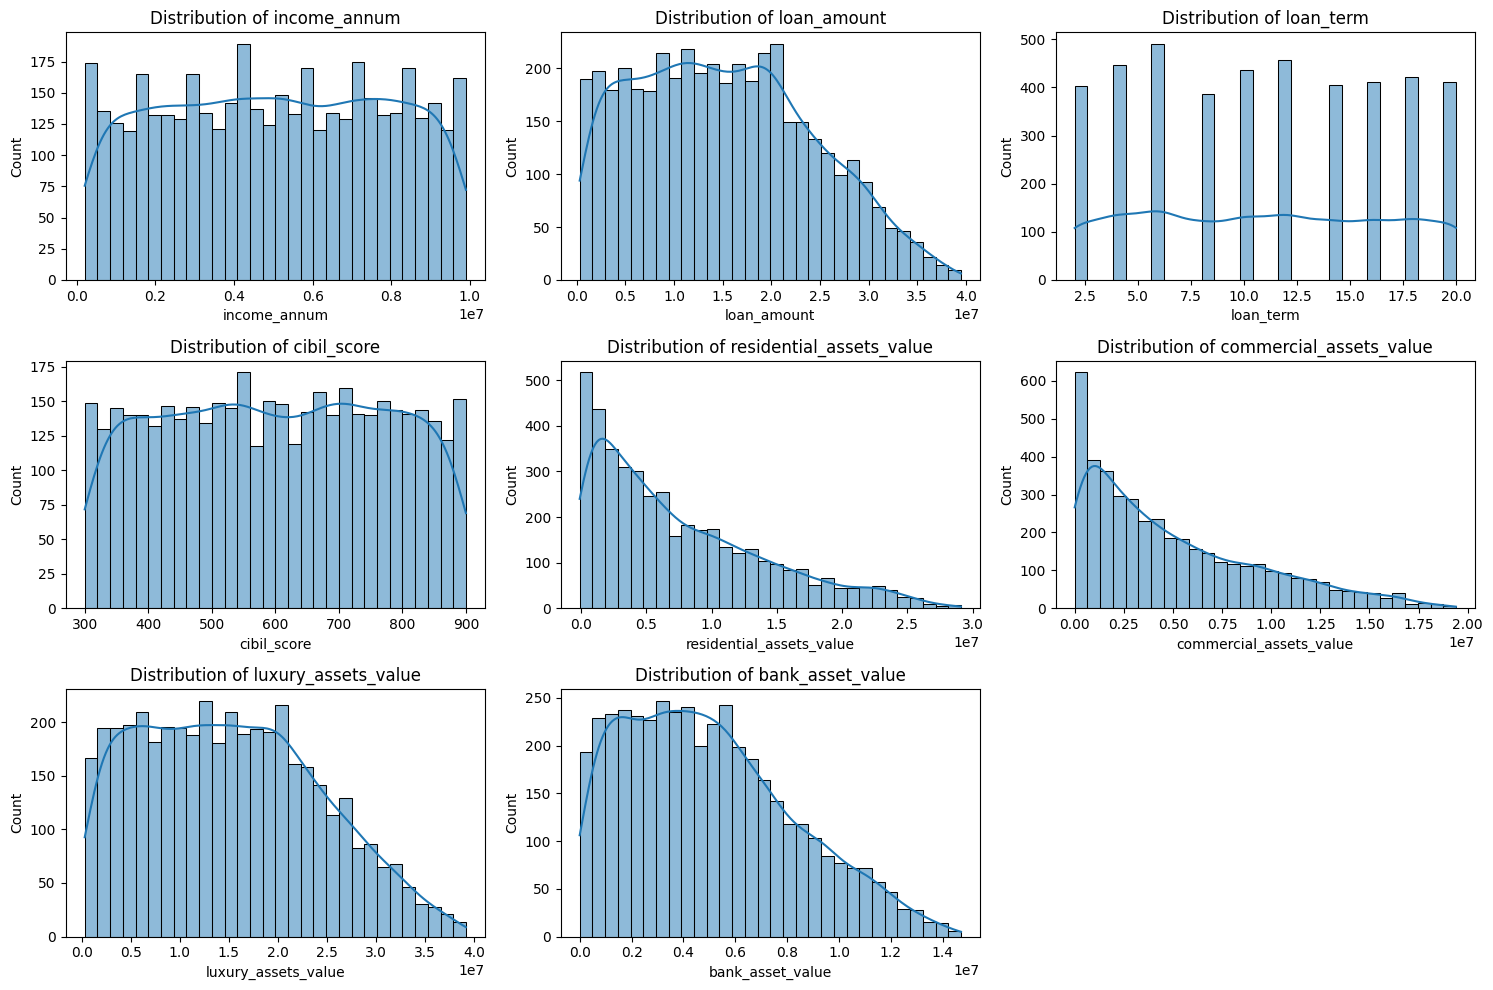

In [46]:
plt.figure(figsize=(15, 10))
cols = ["income_annum",	
        "loan_amount", 
        "loan_term", 
        "cibil_score", 
        "residential_assets_value",	
        "commercial_assets_value",	
        "luxury_assets_value",	
        "bank_asset_value"]

for i in range(len(cols)):
    plt.subplot(3, 3, i + 1)  # 3 rows × 3 cols grid
    sns.histplot(df[cols[i]], kde = True, bins = 30)
    plt.title(f'Distribution of {cols[i]}')

plt.tight_layout()
plt.show()

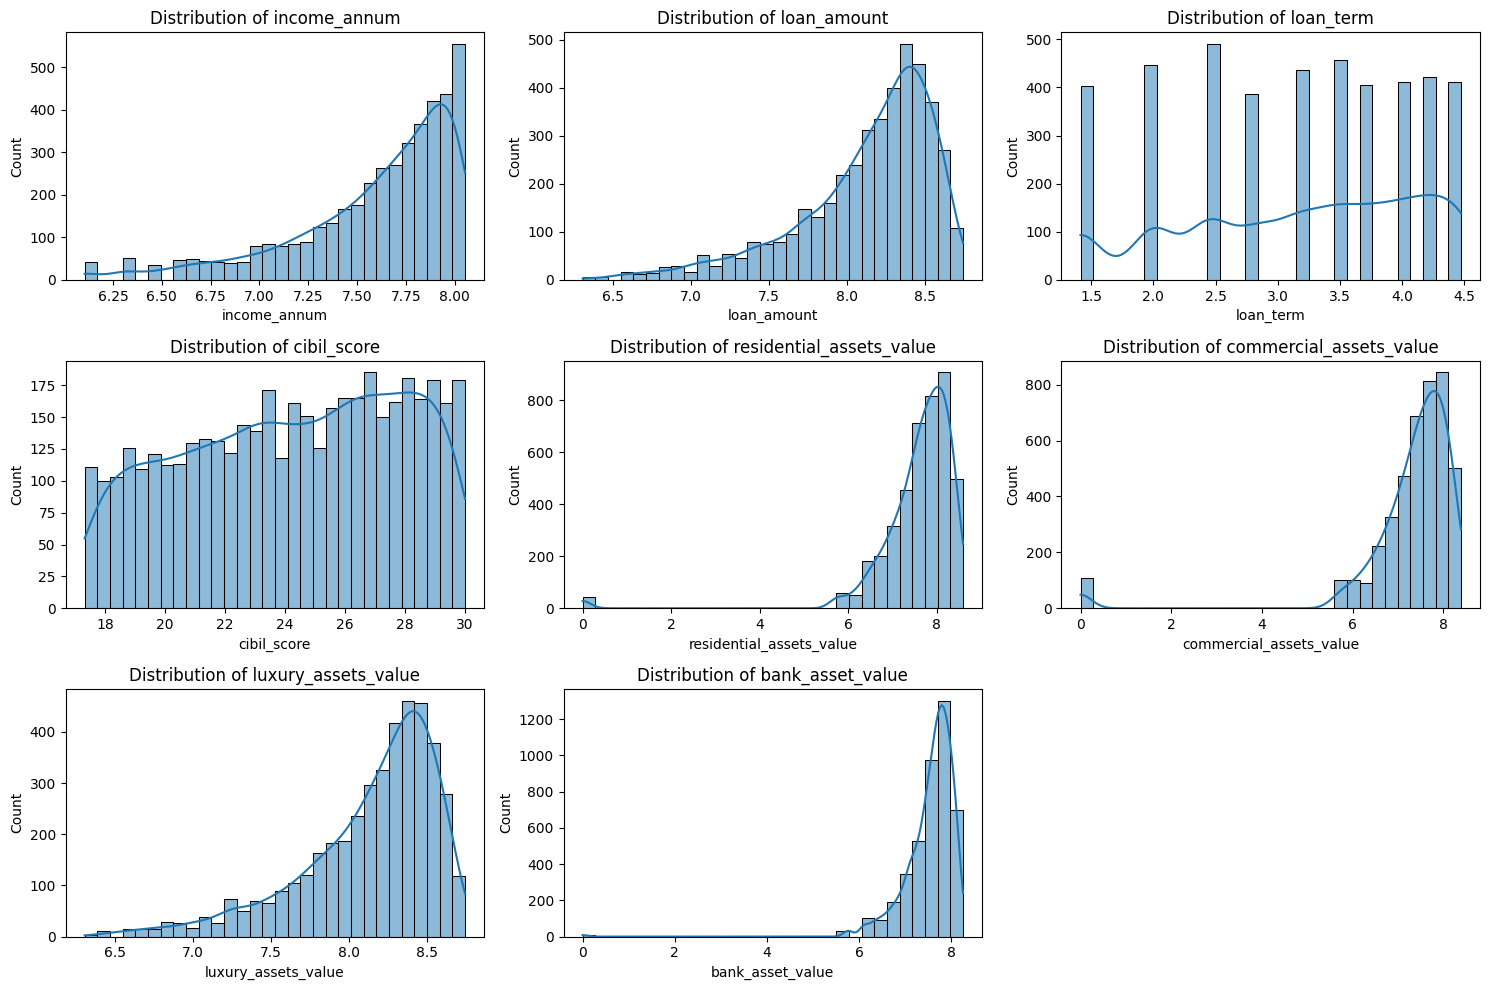

In [48]:
plt.figure(figsize=(15, 10))
cols = ["income_annum",	
        "loan_amount", 
        "loan_term", 
        "cibil_score", 
        "residential_assets_value",	
        "commercial_assets_value",	
        "luxury_assets_value",	
        "bank_asset_value"]

for i in range(len(cols)):
    plt.subplot(3, 3, i + 1)  # 3 rows × 3 cols grid
    sns.histplot(model_data[cols[i]], kde = True, bins = 30)
    plt.title(f'Distribution of {cols[i]}')

plt.tight_layout()
plt.show()

In [49]:
# We can see that earlier the data did not had a normal distribution now it follows a somehow normal distribution.

In [50]:
# Creating dummies for the categorical variables
model_data = pd.get_dummies(model_data, dtype = int)


In [51]:
model_data

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,loan_status_Approved,loan_status_Rejected
0,2,8.038960,8.606867,3.464102,27.892651,7.346135,8.341943,8.469148,7.947830,1,0,1,0,1,0
1,0,7.613743,8.158760,2.828427,20.420578,7.404990,7.302658,7.995468,7.505267,0,1,0,1,0,1
2,3,8.012224,8.603512,4.472136,22.494444,7.888178,7.660265,8.660707,8.182757,1,0,1,0,0,1
3,3,7.960172,8.620067,2.828427,21.610183,8.358700,7.505267,8.482189,7.941542,1,0,1,0,0,1
4,5,8.049266,8.501135,4.472136,19.544820,8.166887,7.960172,8.598437,7.712921,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,6.908755,7.324869,3.464102,17.804494,7.423162,6.562595,7.505267,6.797301,1,0,0,1,0,1
4265,0,7.505267,8.120454,4.472136,23.643181,7.625785,7.440698,8.107004,7.229407,0,1,0,1,1,0
4266,2,7.844049,8.494899,4.242641,21.377558,6.999829,8.166887,8.355946,7.902063,0,1,1,0,0,1
4267,1,7.613743,8.182757,2.828427,27.928480,7.960172,6.730612,8.231109,7.787099,0,1,1,0,1,0


In [52]:
# Removing "loan_status_Rejected"
model_data.drop(['loan_status_Rejected'], axis = 1, inplace = True)

In [67]:
model_data = model_data.rename(columns = {'loan_status_Approved': 'Loan_Status'})

model_data.isnull().sum()

no_of_dependents             0
income_annum                 0
loan_amount                  0
loan_term                    0
cibil_score                  0
residential_assets_value    28
commercial_assets_value      0
luxury_assets_value          0
bank_asset_value             0
education_Graduate           0
education_Not Graduate       0
self_employed_No             0
self_employed_Yes            0
Loan_Status                  0
dtype: int64

In [68]:
model_data['residential_assets_value'].fillna(model_data['residential_assets_value'].mean(),inplace = True)

C:\Users\BINAY\AppData\Local\Temp\ipykernel_9952\1471986906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  model_data['residential_assets_value'].fillna(model_data['residential_assets_value'].mean(),inplace = True)


In [69]:
model_data.isnull().sum()

no_of_dependents            0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
education_Graduate          0
education_Not Graduate      0
self_employed_No            0
self_employed_Yes           0
Loan_Status                 0
dtype: int64

## Feature selection

In [71]:
#Feature separation - x and y (Target variable and independent variable)

x = model_data.drop(['Loan_Status'], axis = 1)
y = model_data['Loan_Status']

In [72]:
x,y = SMOTE().fit_resample(x,y)

<Axes: xlabel='count', ylabel='Loan_Status'>

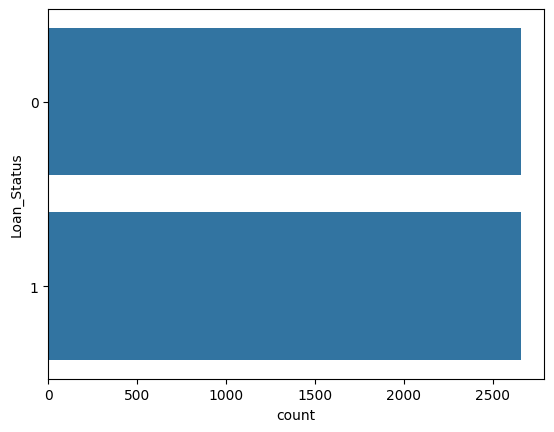

In [73]:
sns.countplot(y = y, data = model_data)

In [74]:
#Data Normalization

x = MinMaxScaler().fit_transform(x)
x

array([[0.4       , 0.9921086 , 0.94291616, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.7739446 , 0.7591503 , ..., 1.        , 0.        ,
        1.        ],
       [0.6       , 0.9783915 , 0.94154026, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.6       , 0.83518272, 0.77085685, ..., 0.        , 0.        ,
        1.        ],
       [0.2       , 0.78801807, 0.71078718, ..., 1.        , 1.        ,
        0.        ],
       [0.2       , 0.94286487, 0.86491506, ..., 0.        , 0.        ,
        1.        ]], shape=(5312, 13))

In [75]:
#Train test split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [76]:
#Modelling:

#Logistic regression

classifier = LogisticRegression(solver = 'saga', max_iter = 500, random_state= 1)

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       522
           1       0.93      0.91      0.92       541

    accuracy                           0.92      1063
   macro avg       0.92      0.92      0.92      1063
weighted avg       0.92      0.92      0.92      1063



In [ ]:
# Logistic regression gives us 92% accuracy

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create the model
dt_classifier = DecisionTreeClassifier(random_state=1)

# Train
dt_classifier.fit(x_train, y_train)

# Predict
y_pred_dt = dt_classifier.predict(x_test)

# Evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       522
           1       0.98      0.99      0.99       541

    accuracy                           0.99      1063
   macro avg       0.99      0.99      0.99      1063
weighted avg       0.99      0.99      0.99      1063



In [ ]:
# Decession tree classification gives us 99% accuracy

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)

# Train
rf_classifier.fit(x_train, y_train)

# Predict
y_pred_rf = rf_classifier.predict(x_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       522
           1       0.99      0.98      0.98       541

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063



In [ ]:
# Decession random forest gives us 98% accuracy